In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from numpy import asarray
import datetime as dt
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
df1 = pd.read_csv('Customer.csv', delimiter=';')
df2 = pd.read_csv('Product.csv', delimiter=';')
df3 = pd.read_csv('Store.csv', delimiter=';')
df4 = pd.read_csv('Transaction.csv', delimiter=';')

In [3]:
dfmerge1 = pd.merge(df4, df3, on='StoreID')
dfmerge1

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
1,TR76340,287,01/01/2022,P4,12000,4,48000,12,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
2,TR97336,233,01/01/2022,P7,9400,2,18800,12,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
3,TR26678,321,02/01/2022,P6,18000,3,54000,12,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
4,TR7826,181,02/01/2022,P1,8800,10,88000,12,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,TR48093,128,28/12/2022,P2,3200,7,22400,11,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403"
5016,TR8560,15,28/12/2022,P9,10000,6,60000,11,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403"
5017,TR45738,328,29/12/2022,P2,3200,3,9600,11,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403"
5018,TR8580,427,30/12/2022,P10,15000,1,15000,11,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403"


In [4]:
dfmerge2 = pd.merge(dfmerge1, df2, on='ProductID')
dfmerge2

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,StoreName,GroupStore,Type,Latitude,Longitude,Product Name,Price_y
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
1,TR36491,117,03/01/2022,P3,7500,4,30000,12,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
2,TR4331,335,08/01/2022,P3,7500,3,22500,12,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
3,TR6445,181,10/01/2022,P3,7500,4,30000,12,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
4,TR75889,154,19/01/2022,P3,7500,3,22500,12,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,TR60466,139,06/12/2022,P5,4200,2,8400,11,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403",Thai Tea,4200
5016,TR39986,134,10/12/2022,P5,4200,5,21000,11,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403",Thai Tea,4200
5017,TR41208,3,18/12/2022,P5,4200,5,21000,11,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403",Thai Tea,4200
5018,TR2469,84,20/12/2022,P5,4200,4,16800,11,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403",Thai Tea,4200


In [5]:
df = pd.merge(dfmerge2, df1, on='CustomerID')
df

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,StoreName,GroupStore,Type,Latitude,Longitude,Product Name,Price_y,Age,Gender,Marital Status,Income
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500,36,0,Married,"10,53"
1,TR57013,328,15/09/2022,P7,9400,6,56400,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666",Coffee Candy,9400,36,0,Married,"10,53"
2,TR97172,328,21/05/2022,P1,8800,5,44000,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666",Choco Bar,8800,36,0,Married,"10,53"
3,TR67395,328,22/01/2022,P8,16000,3,48000,11,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403",Oat,16000,36,0,Married,"10,53"
4,TR45738,328,29/12/2022,P2,3200,3,9600,11,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403",Ginger Candy,3200,36,0,Married,"10,53"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,TR37670,193,26/09/2022,P5,4200,2,8400,7,Buana Indah,Buana,General Trade,"3,316694","114,590111",Thai Tea,4200,42,0,Married,"20,64"
5016,TR98043,385,27/06/2022,P2,3200,7,22400,11,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403",Ginger Candy,3200,41,1,Married,"15,84"
5017,TR91332,385,09/01/2022,P9,10000,1,10000,10,Harapan Baru,Harapan Baru,General Trade,"3,597031","98,678513",Yoghurt,10000,41,1,Married,"15,84"
5018,TR88968,385,21/08/2022,P9,10000,6,60000,9,Lingga,Lingga,Modern Trade,"-3,654703","128,190643",Yoghurt,10000,41,1,Married,"15,84"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TransactionID   5020 non-null   object
 1   CustomerID      5020 non-null   int64 
 2   Date            5020 non-null   object
 3   ProductID       5020 non-null   object
 4   Price_x         5020 non-null   int64 
 5   Qty             5020 non-null   int64 
 6   TotalAmount     5020 non-null   int64 
 7   StoreID         5020 non-null   int64 
 8   StoreName       5020 non-null   object
 9   GroupStore      5020 non-null   object
 10  Type            5020 non-null   object
 11  Latitude        5020 non-null   object
 12  Longitude       5020 non-null   object
 13  Product Name    5020 non-null   object
 14  Price_y         5020 non-null   int64 
 15  Age             5020 non-null   int64 
 16  Gender          5020 non-null   int64 
 17  Marital Status  4976 non-null   object
 18  Income  

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df['Income'] = df['Income'].str.replace(',', '.').astype(float)

In [9]:
df['ProductID'] = df['ProductID'].str.replace('P', '').astype(int)

In [10]:
df.isna().sum()

TransactionID      0
CustomerID         0
Date               0
ProductID          0
Price_x            0
Qty                0
TotalAmount        0
StoreID            0
StoreName          0
GroupStore         0
Type               0
Latitude           0
Longitude          0
Product Name       0
Price_y            0
Age                0
Gender             0
Marital Status    44
Income             0
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,StoreName,GroupStore,Type,Latitude,Longitude,Product Name,Price_y,Age,Gender,Marital Status,Income
0,TR11369,328,2022-01-01,3,7500,4,30000,12,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500,36,0,Married,10.53
1,TR57013,328,2022-09-15,7,9400,6,56400,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666",Coffee Candy,9400,36,0,Married,10.53
2,TR97172,328,2022-05-21,1,8800,5,44000,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666",Choco Bar,8800,36,0,Married,10.53
3,TR67395,328,2022-01-22,8,16000,3,48000,11,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403",Oat,16000,36,0,Married,10.53
4,TR45738,328,2022-12-29,2,3200,3,9600,11,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403",Ginger Candy,3200,36,0,Married,10.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,TR37670,193,2022-09-26,5,4200,2,8400,7,Buana Indah,Buana,General Trade,"3,316694","114,590111",Thai Tea,4200,42,0,Married,20.64
5016,TR98043,385,2022-06-27,2,3200,7,22400,11,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403",Ginger Candy,3200,41,1,Married,15.84
5017,TR91332,385,2022-09-01,9,10000,1,10000,10,Harapan Baru,Harapan Baru,General Trade,"3,597031","98,678513",Yoghurt,10000,41,1,Married,15.84
5018,TR88968,385,2022-08-21,9,10000,6,60000,9,Lingga,Lingga,Modern Trade,"-3,654703","128,190643",Yoghurt,10000,41,1,Married,15.84


In [15]:
numerical = ['Price_x', 'Qty', 'TotalAmount', 'Age', 'Income']
categorical = ['Date', 'ProductID', 'StoreID', 'GroupStore']

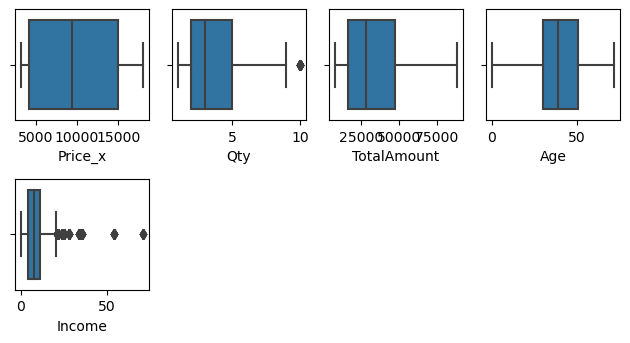

In [16]:
for i in range(0, len(numerical)):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x=df[numerical[i]])
    plt.tight_layout()

C:\Users\KM\AppData\Local\Temp\ipykernel_27380\1002699906.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numerical[i]], kde=True)
C:\Users\KM\AppData\Local\Temp\ipykernel_27380\1002699906.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numerical[i]], kde=True)
C:\Users\KM\AppData\

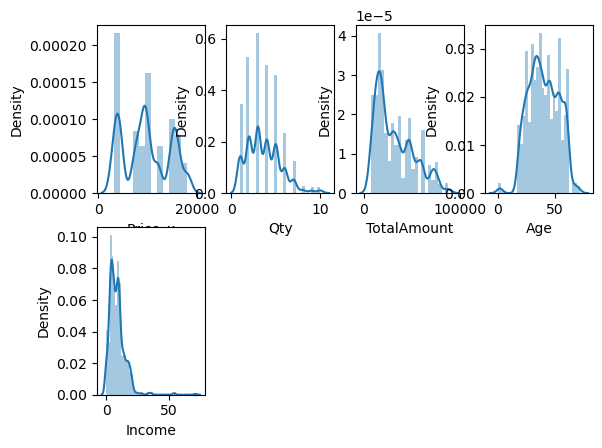

In [17]:
for i in range(0, len(numerical)):
    plt.subplot(2, 4, i+1)
    sns.distplot(df[numerical[i]], kde=True)

NameError: name 'x_train' is not defined

<Figure size 2000x2000 with 0 Axes>

In [19]:
label_encoder = LabelEncoder()
df['CustomerID'] = label_encoder.fit_transform(df['CustomerID'])
df['ProductID'] = label_encoder.fit_transform(df['ProductID'])
df['StoreID'] = label_encoder.fit_transform(df['StoreID'])

NameError: name 'LabelEncoder' is not defined

In [20]:
x = df[['CustomerID', 'ProductID', 'Price_x', 'TotalAmount', 'StoreID', 'Income']]
y = df[['Qty']]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [22]:
df.shape

(4976, 19)

In [23]:
x_train.shape

(3483, 6)

In [24]:
y_train.shape

(3483, 1)

<Figure size 2000x2000 with 0 Axes>

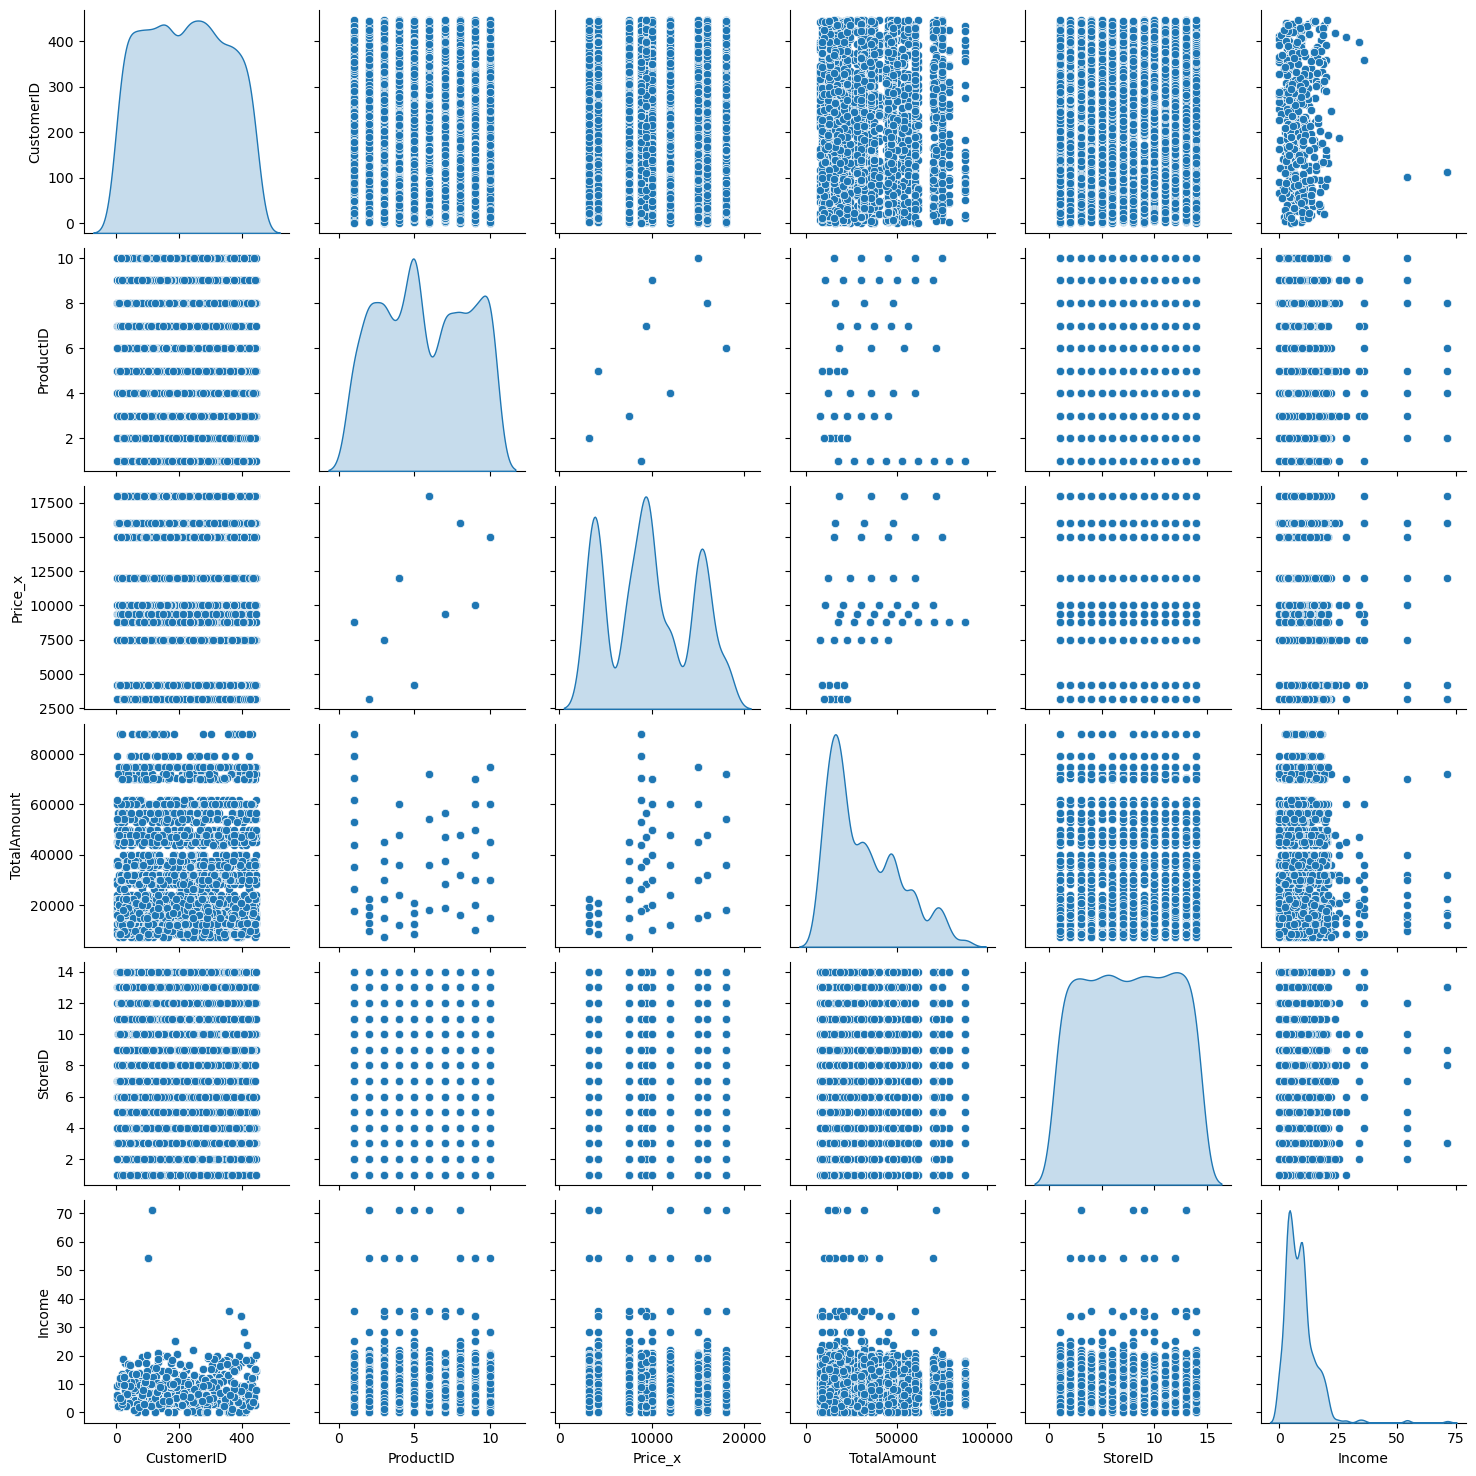

In [25]:
plt.figure(figsize=(20, 20))
sns.pairplot(x_train, diag_kind='kde')

In [28]:
print(f'Jumlah baris sebelum memfilter outlier: {len(x_train)}')

filtered_entries = np.array([True] * len(x_train))

for col in numerical:
    zscore = abs(stats.zscore(x_train[col]))
    filtered_entries = (zscore < 3) & filtered_entries

x_train = x_train[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(x_train)}')

Jumlah baris sebelum memfilter outlier: 3483


KeyError: 'Qty'

In [33]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [30]:
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)

In [35]:
def evaluation(model):
  print('RMSE (test): ' + str(mean_squared_error(y_test, y_pred, squared=False)))
  print('RMSE (train): ' + str(mean_squared_error(y_train, y_pred_train, squared=False)))

  print('MAPE (test): ' + str(mean_absolute_percentage_error(y_test, y_pred)))
  print('MAPE (train): ' + str(mean_absolute_percentage_error(y_train, y_pred_train)))

  print('r2 (test): ' + str(r2_score(y_test, y_pred)))
  print('r2 (train): ' + str(r2_score(y_train, y_pred_train)))

  # k-fold cross validation
  score = cross_validate(model, x, y, cv=5, scoring=['r2', 'neg_root_mean_squared_error'], return_train_score=True)
  print('r2 (cross-val test): ' + str(score['test_r2'].mean()))
  print('r2 (cross-val train): ' + str(score['train_r2'].mean()))
  print('RMSE (cross-val test): ' + str(score['test_neg_root_mean_squared_error'].mean()))
  print('RMSE (cross-val train): ' + str(score['train_neg_root_mean_squared_error'].mean()))

evaluation(regressor)

RMSE (test): 0.6232824430375881
RMSE (train): 0.6495942189288405
MAPE (test): 0.198222576858548
MAPE (train): 0.20972544208776764
r2 (test): 0.8869563637250578
r2 (train): 0.8775484253787011
r2 (cross-val test): 0.8790701238078107
r2 (cross-val train): 0.8805829770469564
RMSE (cross-val test): -0.6448217400275201
RMSE (cross-val train): -0.6412664769600279


In [38]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
evaluation(rf)

C:\Users\KM\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RMSE (test): 0.6232824430375881
RMSE (train): 0.6495942189288405
MAPE (test): 0.198222576858548
MAPE (train): 0.20972544208776764
r2 (test): 0.8869563637250578
r2 (train): 0.8775484253787011


C:\Users\KM\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\KM\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\KM\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\KM\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

r2 (cross-val test): 1.0
r2 (cross-val train): 1.0
RMSE (cross-val test): 0.0
RMSE (cross-val train): 0.0


In [41]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
evaluation(dt)

RMSE (test): 0.6232824430375881
RMSE (train): 0.6495942189288405
MAPE (test): 0.198222576858548
MAPE (train): 0.20972544208776764
r2 (test): 0.8869563637250578
r2 (train): 0.8775484253787011
r2 (cross-val test): 1.0
r2 (cross-val train): 1.0
RMSE (cross-val test): 0.0
RMSE (cross-val train): 0.0
